## 3.1 Linear Regression
### 3.1.1 What is Linear Regression
Begin with this example:

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

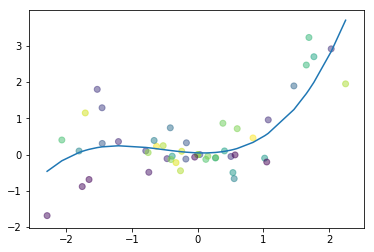

In [2]:
n = 50
np.random.seed(7)
x = np.random.randn(n)
y = x * np.random.randn(n)

colors = np.random.rand(n)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 3))(np.unique(x)))
plt.scatter(x, y, c=colors, alpha=.5)
plt.show()

Basicly, we are trying to model the behavior of the data using the line.

### 3.1.2 Toy Example
The example given is too simple and not robust enough. Here is the [regression example](https://github.com/pytorch/examples/blob/master/regression/main.py) from PyTorch.

This example is trying to model the equation:
$$ y = 2x+1$$

#### 1. Build Dataset

In [3]:
x = list(range(15))
x_train = np.array(x, dtype=np.float32).reshape(-1,1)
#y_train = (2*np.power(x_train,3) + 7*x_train + 13).reshape(-1,1)
y_train = (2*x_train+1)
print(x_train.shape, y_train.shape)

(15, 1) (15, 1)


#### 2. Building Model

In [4]:
import torch.nn as nn
from torch.autograd import Variable

In [5]:
# Create Class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [6]:
input_dim, output_dim = 1, 1
model = LinearRegressionModel(input_dim, output_dim)
#model.cuda()

#### 3. Loss Fucntion
Use Mean Squared Error here.

In [7]:
criterion = nn.MSELoss()

#### 4. Optmization

In [8]:
lrt = 0.01 #learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=lrt)

#### 5. Training Model

In [9]:
epochs = 500

In [10]:
for epoch in range(epochs):
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # Logging
    if epoch%50==49:
        print('epoch {}, loss {}'.format(epoch+1, loss.data[0]))

epoch 50, loss 0.4906459152698517
epoch 100, loss 0.2838279604911804
epoch 150, loss 0.16418834030628204
epoch 200, loss 0.09497933089733124
epoch 250, loss 0.05494360998272896
epoch 300, loss 0.031783636659383774
epoch 350, loss 0.018386119976639748
epoch 400, loss 0.010635981336236
epoch 450, loss 0.006152720656245947
epoch 500, loss 0.0035592252388596535


#### 6. Prediction

In [11]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[ 0.8870349],
       [ 2.8987682],
       [ 4.9105015],
       [ 6.922235 ],
       [ 8.933968 ],
       [10.945702 ],
       [12.957436 ],
       [14.969168 ],
       [16.980902 ],
       [18.992636 ],
       [21.004368 ],
       [23.016102 ],
       [25.027836 ],
       [27.039568 ],
       [29.051302 ]], dtype=float32)

In [12]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.],
       [23.],
       [25.],
       [27.],
       [29.]], dtype=float32)

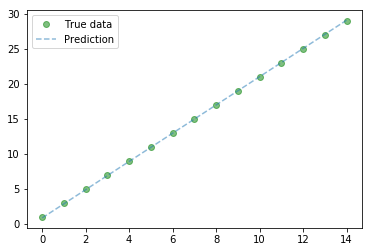

In [13]:
plt.clf()
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train, y_train, 'go', label="True data", alpha=.5)
plt.plot(x_train, predicted, '--', label="Prediction", alpha=.5)
plt.legend(loc='best')
plt.show()

#### 6. Save & Load Model

In [14]:
save_model = False
if save_model is True:
    torch.save(model.state_dict(), 'saved_model.pkl')
    
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('saved_model.pkl'))